In [55]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

![image info](lecture_problem_001.png)

In [56]:
bottles_regions = [23, 87, 12, 98, 56]
D = 1

lowest_speed = 1
highest_speed = max(bottles_regions)

def is_this_speed_possible(speed):
    days = 0
    for bottles in bottles_regions:
        days += math.ceil(bottles/speed)
    return days > D 

bottles_regions.sort() #sort the list before binary search

#need to minimize the number of random picks we make
while lowest_speed < highest_speed:
    mid = (lowest_speed + highest_speed) // 2

    #instead of comparing against mid, we use an auxiliary function to reduce the numbe rof comparions
    if is_this_speed_possible(mid):
        lowest_speed = mid + 1
    else:
        highest_speed = mid - 1
print("Lowest possible speed: ", lowest_speed)

"""
sorting was not necessary cuz it works in the same way without as well. But binary search doesn't work without sorted list.why?
because we are traversing through the speeds sequentially so we don't need to sort anything.
"""


Lowest possible speed:  98


"\nsorting was not necessary cuz it works in the same way without as well. But binary search doesn't work without sorted list.why?\nbecause we are traversing through the speeds sequentially so we don't need to sort anything.\n"

In [57]:
def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

create_list_custom(10,1000,10,6)

[113, 338, 462, 584, 197, 543, 10, 514, 194, 781, 509]

In [58]:
def draw_show_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

## Bubble Sort

In [59]:
def bubble_sort(data):
    for iteration in range(len(data)-1, 0, -1):
        for index in range(iteration):
            if data[index] > data[index+1]:
                data[index],data[index+1]=data[index+1],data[index]

In [60]:
def bubble_sort_II(data):
    no_more_swap =True
    while no_more_swap:
        no_more_swap = False
        for iteration in range(len(data)-1, 0, -1):
            for index in range(iteration):
                if data[index] > data[index+1]:
                    data[index],data[index+1]=data[index+1],data[index]

[8, 82, 47, 85, 84, 5, 40, 16, 26, 23]


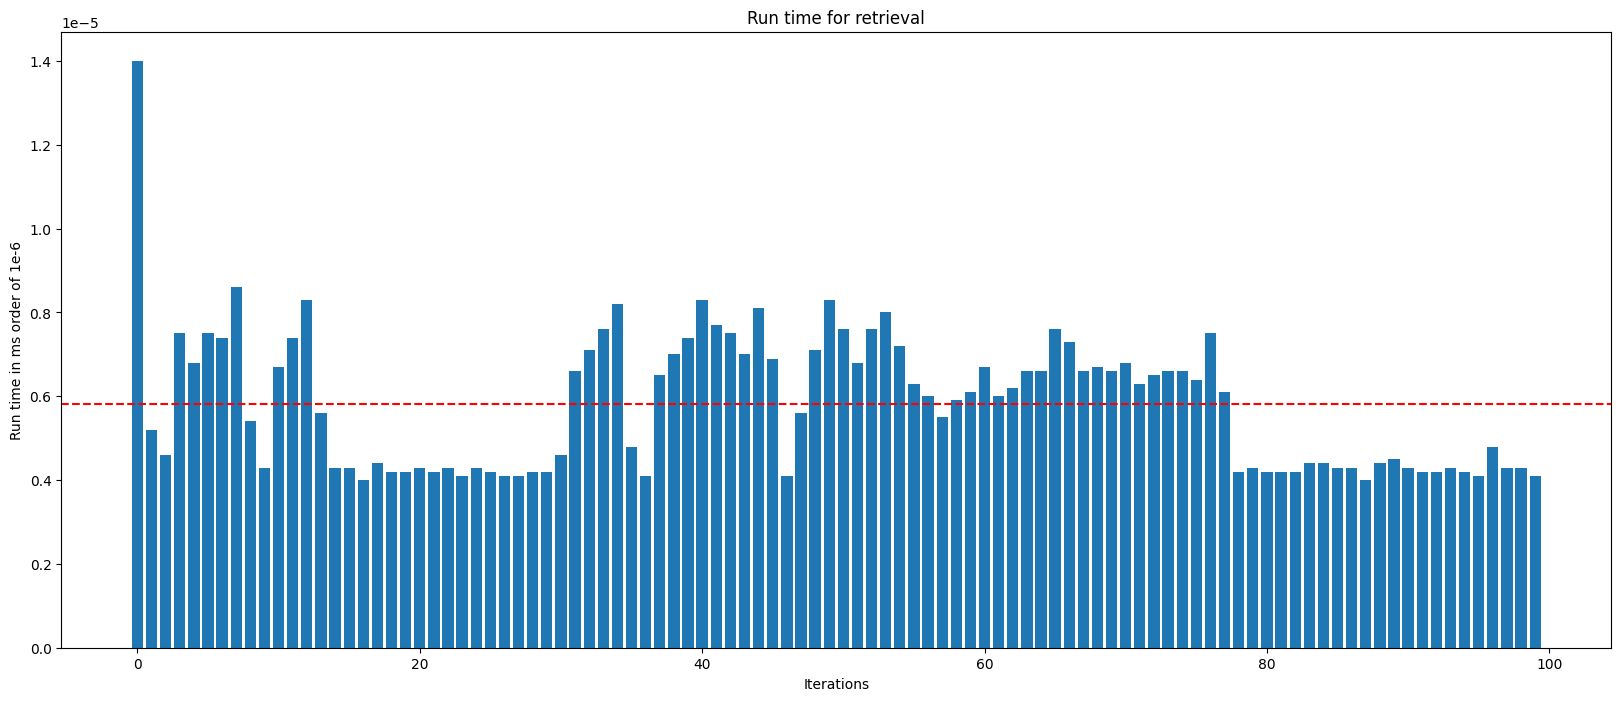

In [61]:
runs = 100
run_times = []
my_list=create_list_custom(10,100)
print(my_list)
for _ in range(runs):
    start = timeit.default_timer()
    found = bubble_sort(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

[90, 13, 42, 56, 53, 77, 69, 90, 47, 95]


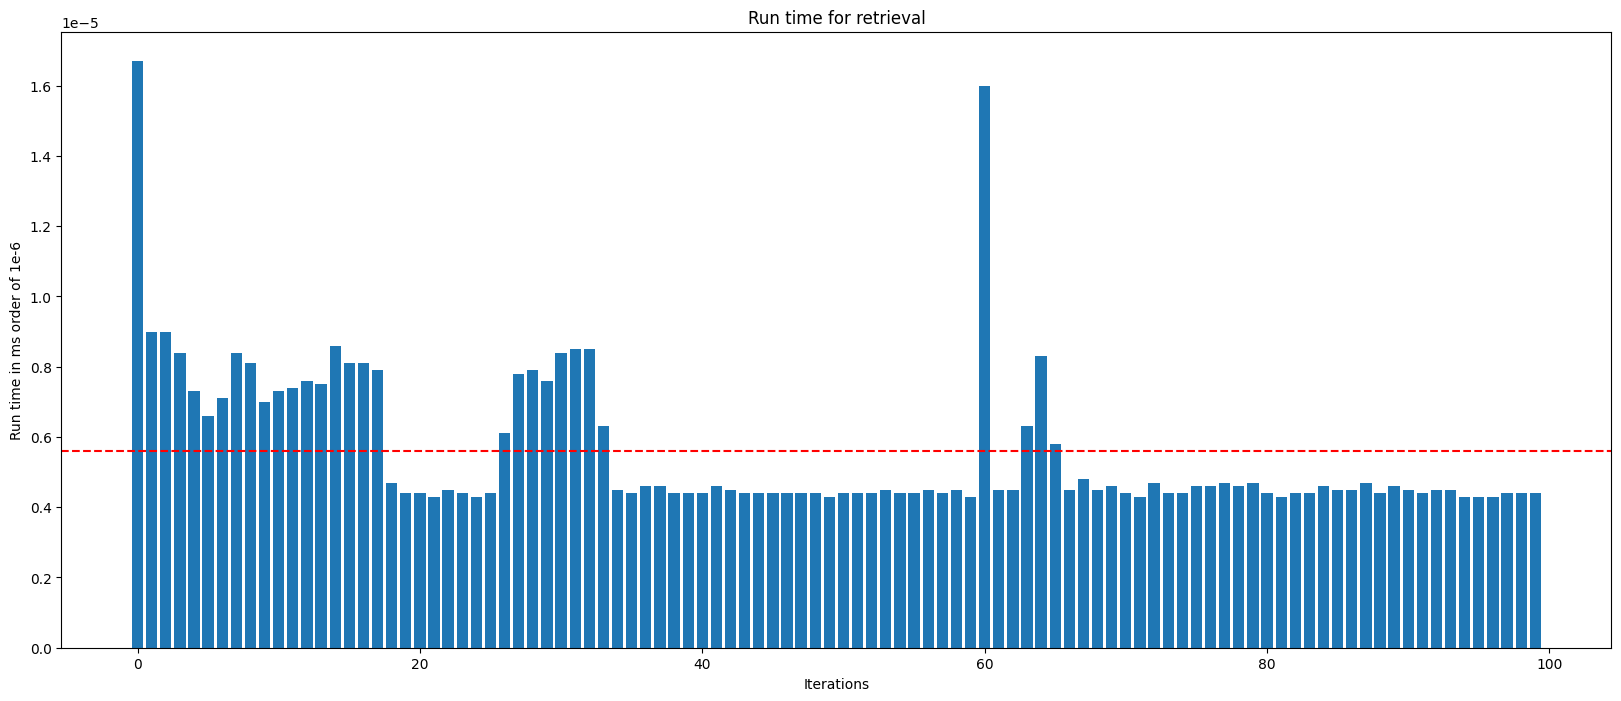

In [62]:
runs = 100
run_times = []
my_list=create_list_custom(10,100)
print(my_list)
for _ in range(runs):
    start = timeit.default_timer()
    found = bubble_sort_II(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

## Insertion Sort

In [63]:
items=create_list_custom(10,100)
items

[26, 8, 8, 73, 33, 60, 41, 49, 64, 72]

In [64]:
def insertion_sort_I(data):
    for index in range(1, len(data)):
        while index > 0 and data[index] < data[index-1]:
            data[index],data[index-1]=data[index-1],data[index]
            index -= 1

### Experiments

[13, 74, 10, 20, 42, 10, 82, 67, 5, 27]


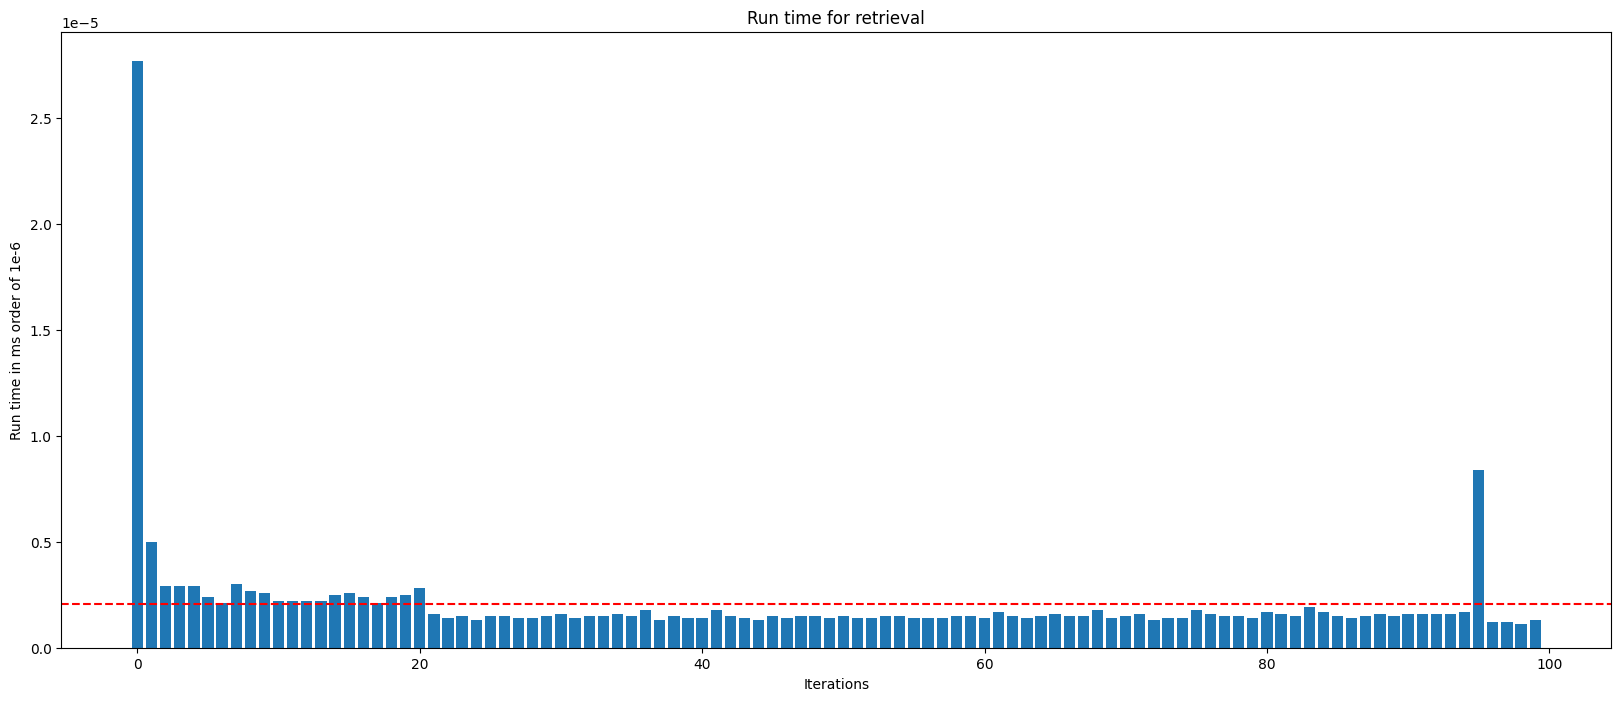

In [65]:
runs = 100
run_times = []
my_list=create_list_custom(10,100)
print(my_list)
for _ in range(runs):
    start = timeit.default_timer()
    found = insertion_sort_I(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)